### Задача

Правда ли бикас дает преимущество? Или лучше разгонять без всяких там бикасов

In [1]:
import os
wd = os.getcwd()
wd = os.path.dirname(os.path.dirname(wd))
import sys
sys.path.append(wd+"\\src\\")

In [2]:
from tube import InterpXY,Tube,BorderSimple
from math import *
import numpy as np
from powderlayer import PowderBD, PowderOvLayer, Powder
from gaslayer import GasEOS, GasLayer
from pistonlayer import ElPistEOS, ElPistLayer
import pprint as pp

In [3]:
from tqdm import tqdm_notebook
from matplotlib.patches import Polygon
import matplotlib as mpl
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed
import ipywidgets

%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 

mpl.rcParams['figure.figsize'] = (5,3) 

In [4]:
import json
from functional import seq

#### Простая цилиндрическая пушка

q_max = 0.12166999999999997


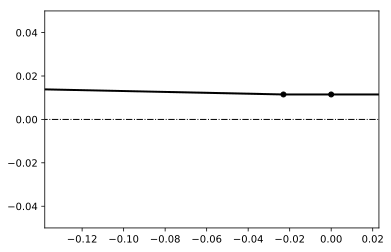

In [5]:
d = 23e-3
C_q_max = 10
q_max = C_q_max * (d*10)**3
print(f'q_max = {q_max}')


tube_dict = {
    'tube_points': [[-d*100,3*d],[-d*50,3*d],[-d,d],[0, d], [100*d, d]]
}
tube = Tube.get_standart(tube_dict)
ax, fig = plt.subplots()
tube.plot(ax, fig)
fig.set_ylim(-0.05,0.05)
fig.set_xlim(-6*d,d)
plt.show()

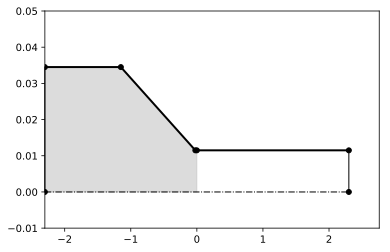

GasLayer(n_cells=300); 
        {'p_max':100000000.0, 'tau_min': 4.339421760903592e-06, 
        'u_max': 0.0, 'cs_max': 1984.1225980567192, 'dx_min': 0.008609944778307899, 
        'x_1': -2.5829834334924726, 'x_2': 0.0,
        'V_1':  0.0, 'V_2':  0.0  }

In [9]:
gas_layer_dict = {
    'type': 'gas',
    'name': 'He',
    'gamma': 1.66,
    'kappa': 0.005925,
    'R': 2078,
    'T_0': 300, # K
    'W_0': 0.0003,  # м^3 объем газа
    'p_0': 100e6, # начальное давление газа
    'u_0': 0,     #начальная скорость
    'x_2': 0
}

calc_settings = {
    'cell_dx': 0.0025,
    'n_cells': 300,
    'n_cells_min': 13,
    'n_cells_max': 300,
    'GasFluxCalculator_kwargs': {'flux_type':1, 'x_order':1},
    'GridStrecher_kwargs': {}
} 

ro_0 = gas_layer_dict['p_0']/(gas_layer_dict['R']*gas_layer_dict['T_0'] + gas_layer_dict['p_0']*gas_layer_dict['kappa'])
omega = q_max * 5
gas_layer_dict['W_0'] = omega / ro_0
x1 = tube.get_x1(gas_layer_dict['x_2'], gas_layer_dict['W_0'])

gl = GasLayer.get_standart(tube, x1, gas_layer_dict, calc_settings)   

fig, ax = plt.subplots()
tube.plot(fig, ax)
gl.plot(fig, ax)
ax.set_ylim(-0.01,0.05)
ax.set_xlim(-100*d,120*d)
plt.show()

gl

In [10]:
lrs = [gl]
b = BorderSimple(gl, None, q_max, 0)
vl = 0
for i in tqdm_notebook(range(20000)):
    if lrs[-1].xs_borders[-1] > tube.get_xs()[-1]:
        break
    tau = lrs[-1].get_tau_min()*0.3
    b.update_xs()
    b.update_Vs(tau)
    gl = gl.step_up(tau, False)
    lrs.append(gl)
    b.lr_left = gl
    
    

suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455
suc 455



In [11]:
@interact(ind=ipywidgets.IntSlider(min=0,max=len(lrs)-1,step=100, value=0))
def plotMe(ind):
    
    lr = lrs[ind]
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharex=True, figsize=(10,7), gridspec_kw={'height_ratios':[2, 2, 1]})
    tube.plot(fig, ax2)
    ax2.set_ylim(-0.005, 0.02)
    lr.plot(fig, ax2)
    
    param_name = 'us'
    xs = np.array(lr.xs_cells)
    ys = np.array(getattr(lr, param_name))
    color = lr.color_4_plot
    lw = 2
    ax0.plot(xs, ys, color=color, lw=lw, label=f'{param_name} газ')

    ax0.grid(True)
    ax0.set_ylabel(param_name)
#     ax0.set_ylim(900,1000)
    ax0.set_title(f't={lr.time*1000} ms; i={ind}')
    ax0.legend()
    
    param_name = 'ps'
    xs = np.array(lr.xs_cells)
    ys = np.array(getattr(lr, param_name))
    color = lr.color_4_plot
    lw = 2
    ax1.plot(xs, ys/1e5, color=color, lw=lw, label=f'{param_name} газ')
    
    
    ax1.grid(True)
    ax1.set_ylabel(f'$p$, атм.')
#     ax1.set_ylim(-500,700)
#     ax1.set_title(f't={lr.time*1000} ms; i={ind}')
    ax1.legend()
    plt.show()

interactive(children=(IntSlider(value=0, description='ind', max=20000, step=100), Output()), _dom_classes=('wi…